# Volume 3: K-Means Clustering.
    Benj McMullin
    Math 403
    10/10/2023

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
import sklearn
from sklearn.cluster import KMeans
import math
import seaborn as sns
import os
from IPython.display import Image, display
from PIL import Image
%matplotlib inline

In [2]:
plt.rcParams["figure.dpi"] = 200

## Problem 1

Write a `KMeans` class for doing basic $k$-means clustering.
Implement the following methods.
1. `__init__()`: Accept a number of clusters $k$, a maximum number of iterations, and a convergence tolerance.
Store these as attributes.

2. `fit()`: Accept an $m \times n$ matrix $X$ of $m$ data points with $n$ features.
Choose $k$ random rows of $X$ as the initial cluster centers.
Run the $k$-means iteration until consecutive centers are within the convergence tolerance, or until iterating the maximum number of times.
Save the cluster centers as attributes.
If a cluster is empty, reassign the cluster center as a random row of $X$.

3. `predict()`: Accept an $l \times n$ matrix $X$ of data.
Return an array of $l$ integers where the $i$-th entry indicates which cluster center the $i$-th row of $X$ is closest to.

4. `plot()`: Accept an $l \times n$ matrix $X$ of $l$ data points and an array $y$ of $l$ integers representing the labels.
Plot each data point from the matrix, colored by cluster, along with the cluster centers.
Note that in this case, $n = 2$.

Test your class on the iris data set (`sklean.datasets.load_iris()`) after reducing the data to two principal components (with `sklearn.decomposition.PCA`).
Plot the data, coloring by cluster.

In [3]:
class KMeans:
    """Basic k-means clustering class."""
    def __init__(self, n_clusters=8, max_iter=100, p=2., tol=1e-5, normalize=False):
        """Store clustering algorithm parameters.
        
        Parameters:
            n_clusters (int): How many clusters to compute.
            max_iter (int): The maximum number of iterations to compute.
            tol (float): The convergence tolerance.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.p = p
        self.normalize = normalize        # This is for Problem 3.
    
    def fit(self, X, y=None):
        """Compute the cluster centers from random initial conditions.
        
        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        # Number of rows in X and number of clusters
        x_rows = X.shape[0]
        k_cluster = self.n_clusters
        
        # Randomly choose k data points as the initial cluster centers
        centers = random.choices(X,k=k_cluster)
        # self.ogcenters = centers
        
        for i in range(self.max_iter):

            # Creating a dictionary to store the assignments of each point to a cluster
            assignments = dict()
            
            # Assign each point to the closest cluster center
            for j in X:

                # Finding the index of the closest cluster center
                x_rows = np.argmin([np.linalg.norm(u - j, ord = self.p) for u in centers])
                
                # Adding the point to the cluster
                if x_rows in assignments:
                    assignments[x_rows].append(j)
                else:
                    assignments[x_rows] = [j]
            
            # Re-compute the cluster centers as the means of the new clusters
            for x in range(k_cluster):

                # Adjusting the centers to be the mean of the points in the cluster
                if x not in assignments:
                    assignments[x] = [random.choice(X)]
            
            # Adjusting the centers to be the mean of the points in the cluster
            adjusted_centers = [np.mean(assignments[x], axis = 0) for x in range(k_cluster)]
            
            # Normalizing the centers if normalize is true
            if self.normalize:

                # Normalizing the centers
                for x in range(k_cluster):
                    adjusted_centers[x] = adjusted_centers[x]/np.linalg.norm(adjusted_centers[x])
            
            # Checking if the centers have converged
            if all([np.linalg.norm(adjusted_centers[x] - centers[x]) < self.tol for x in range(k_cluster)]):
                break
            
            # Updating the centers
            centers = adjusted_centers.copy()
        
        # Storing the centers and assignments
        self.centers = centers
        self.assignments = assignments
            
        return self
    
    def predict(self, X):
        """Classify each entry of X based on which cluster center it belongs to.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        
        Returns:
            ((n_samples) ndarray): Integer labels from 0 to n_clusters for each entry of X.
        """
        # Number of rows in X and number of clusters
        list_l = [None] * X.shape[0]
        j = 0

        # Number of rows in X and number of clusters
        for i in X:

            # Finding the index of the closest cluster center
            center_index = 0
            short_dist = np.linalg.norm(i - self.centers[0], ord = self.p)
            
            # Loop through centers, starting at 1
            for c in self.centers[1:]:
                
                # Find distance between point and center
                dist = np.linalg.norm(i - c, ord = self.p)

                # If distance is shorter, update short_dist and center_index
                if dist < short_dist:
                    short_dist = dist
                    center_index += 1
            
            # Add center_index to l_list
            list_l[j] = center_index
            j += 1
            
        # Convert l_list to a numpy array
        l_array = np.array(list_l)
            
        return l_array
    
    def fit_predict(self, X):
        """Fit to the data and return the resulting labels.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        return self.fit(X).predict(X)
    
    def plot(self, new_lims = False, XMIN = 0., XMAX = 0., YMIN = 0., YMAX = 0., new_titles = False, TITLE='',XLABEL='',YLABEL=''):
        """Plot each of the data points, colored by cluster.
        Plot each of the cluster centers using a different marker.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data being clustered.
            y ((n_samples) ndarray): the labels for each of the samples.
        """
        # Getting the number of clusters
        colors = sns.color_palette(n_colors = self.n_clusters)
        markers = ['*','.','x','d','2','^','s','p','+']      # Length = 9
        
        # Plotting the points by cluster
        plt.figure(figsize = (8,6))
        
        # Iterating through the clusters
        iter = 0
        
        # Plotting the points by cluster
        for key in self.assignments:
            
            # Iterating through the points in the cluster
            for j in range(len(self.assignments[key])):
                
                # Plotting the x coord (point[0]) with its y coord (point[1])
                point = self.assignments[key][j]
                
                # Plotting the point
                plt.plot(point[0],point[1], color = colors[iter], marker = markers[iter])
                
            # Incrementing the iter
            iter = (iter + 1) % 9
            
        # Plotting the centers
        i = 0
        for point in self.centers:
            if i == 0:
                plt.plot(point[0],point[1],'kP',markersize = 8, label = "Means")
            else:
                plt.plot(point[0],point[1],'kP',markersize = 8)
            i += 1
        plt.legend(loc = 'upper left')
        
        assgn = self.assignments
        
        # Finding the min and max x and y values
        x_min = min([assgn[key][index][0] for key in assgn for index in range(len(assgn[key]))])
        
        # math.floor rounds down to nearest integer
        x_min = math.floor(x_min)
        
        x_max = max([assgn[key][index][0] for key in assgn for index in range(len(assgn[key]))])
        
        # math.ceil rounds up to nearest integer
        x_max = math.ceil(x_max)
        
        # Finding the min and max y values
        y_min = min([assgn[key][index][1] for key in assgn for index in range(len(assgn[key]))])
        y_min = math.floor(y_min)
        y_max = max([assgn[key][index][1] for key in assgn for index in range(len(assgn[key]))])
        y_max = math.ceil(y_max)
        
        # Setting the x and y limits
        if not new_lims:
            
            # Setting the x and y limits
            plt.xlim([x_min,x_max])
            plt.ylim([y_min,y_max])
        
        # Setting the x and y labels
        else: 
            
            # Setting the x and y limits
            plt.xlim([XMIN,XMAX])
            plt.ylim([YMIN,YMAX])
        
        # Setting the title and labels
        if new_titles:
            
            # Setting the title and labels
            plt.title(TITLE)
            plt.xlabel(XLABEL)
            plt.ylabel(YLABEL)
            
        # Setting the title and labels
        else:
            plt.xlabel('First Principle Component')
            plt.ylabel('Second Principle Component')
        
    def returnDictandCenters(self):
        return self.assignments, self.centers

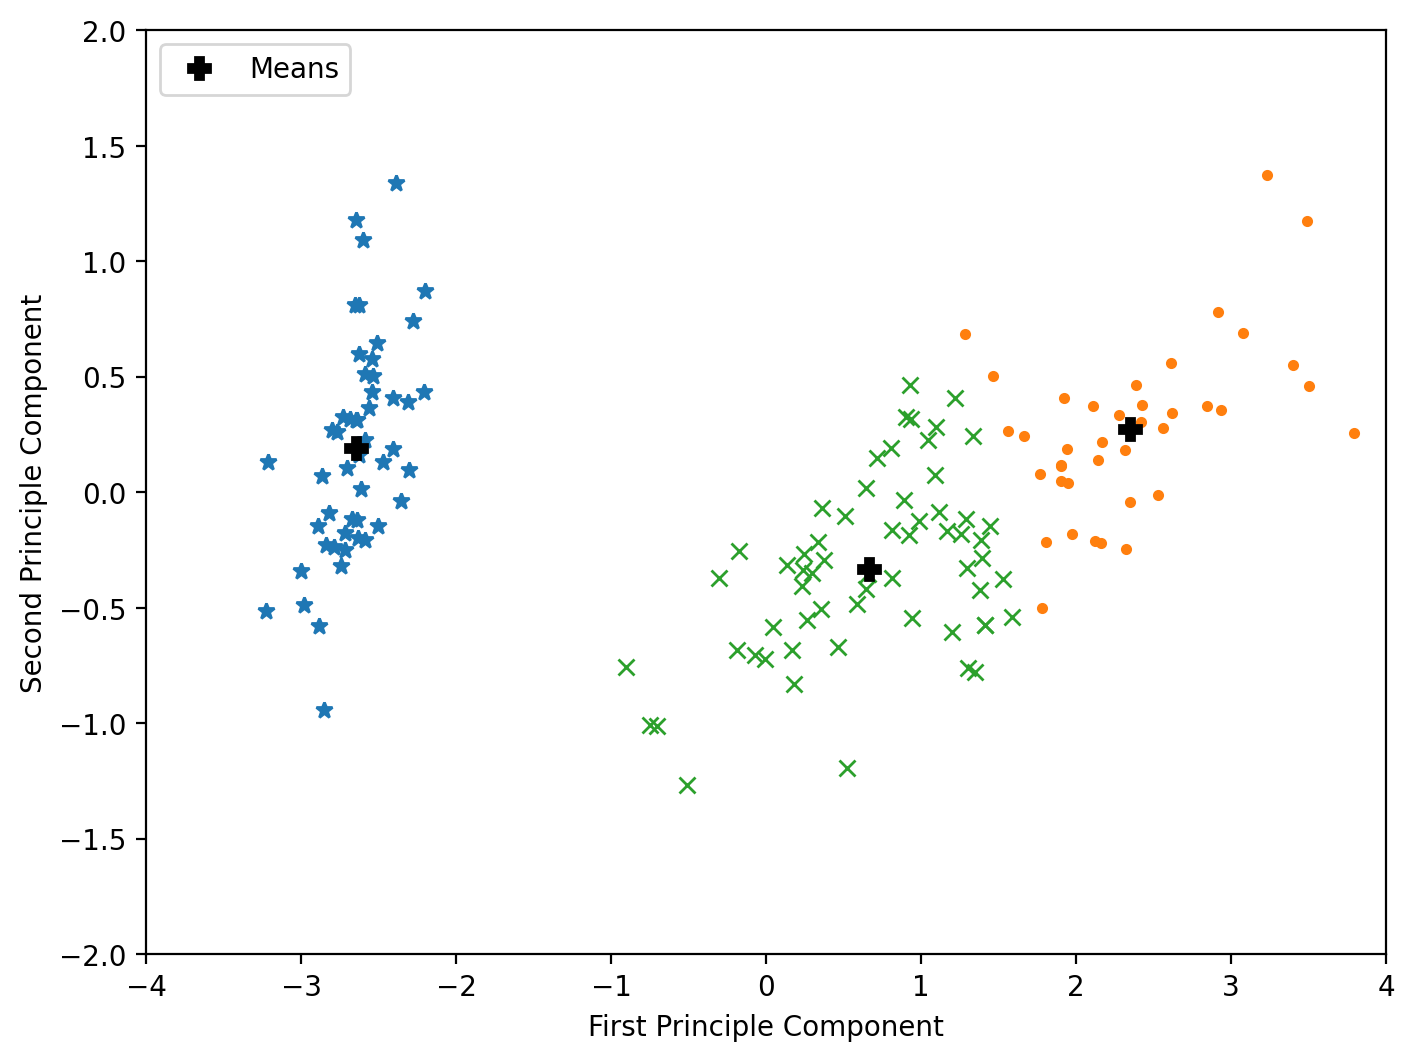

In [37]:
# Load in Iris data
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()

# Look only at the first two principal components, since we are only working in 2 dimensions
iris_data = PCA(n_components=2).fit_transform(iris.data)

# Fit the data to the KMeans class
# Plot data
IRIS = KMeans(n_clusters = 3)
IRIS.fit(iris_data)
IRIS.plot()

## Problem 2
Using the Methods you wrote in Problem 1, add a parameter, $p$, to your class that denotes the norm and defaults to 2.
Save p as an attribute to be used in your fit() and predict() functions.
Using the latitude and longitude data in $\text{sacramento.npy}$ find the optimal placement for 12 fire stations. 
Plot the longitude and latitudes, the centers, and color them by cluster.
Make plots for different values for $p$ to find the optimal locations for the fire stations.
In a Markdown cell report which norm was the best at keeping the maximum distance small.

In [21]:
# Loading the data
sacramento = np.load("sacramento.npy")
sacramento_coords = sacramento[:, 6:]

# swap the data
sacramento_coords_swapped = np.column_stack((sacramento_coords[:, 1], sacramento_coords[:, 0]))

# Compute the 1-norm using the swapped data
sac_1norm = KMeans(n_clusters=12, p=1)
sac_1norm.fit(sacramento_coords_swapped)

# Computing the 2 norm using the swapped data
sac_2norm = KMeans(n_clusters = 12, p = 2)
sac_2norm.fit(sacramento_coords_swapped)

# Computing the infinity norm using the swapped data
sac_Infnorm = KMeans(n_clusters = 12, p = np.inf)
sac_Infnorm.fit(sacramento_coords_swapped)

In [22]:
# Max distance using the 1-norm
max([np.linalg.norm(point - sac_1norm.centers[key]) for key in sac_1norm.assignments for point in sac_1norm.assignments[key]])

0.16055484075097773

In [23]:
# Max distance using the 2-norm
max([np.linalg.norm(point - sac_2norm.centers[key]) for key in sac_2norm.assignments for point in sac_2norm.assignments[key]])

0.19396549396022408

In [24]:
# Max distance using the infinity norm
max([np.linalg.norm(point - sac_Infnorm.centers[key]) for key in sac_Infnorm.assignments for point in sac_Infnorm.assignments[key]])

0.19260502417451134

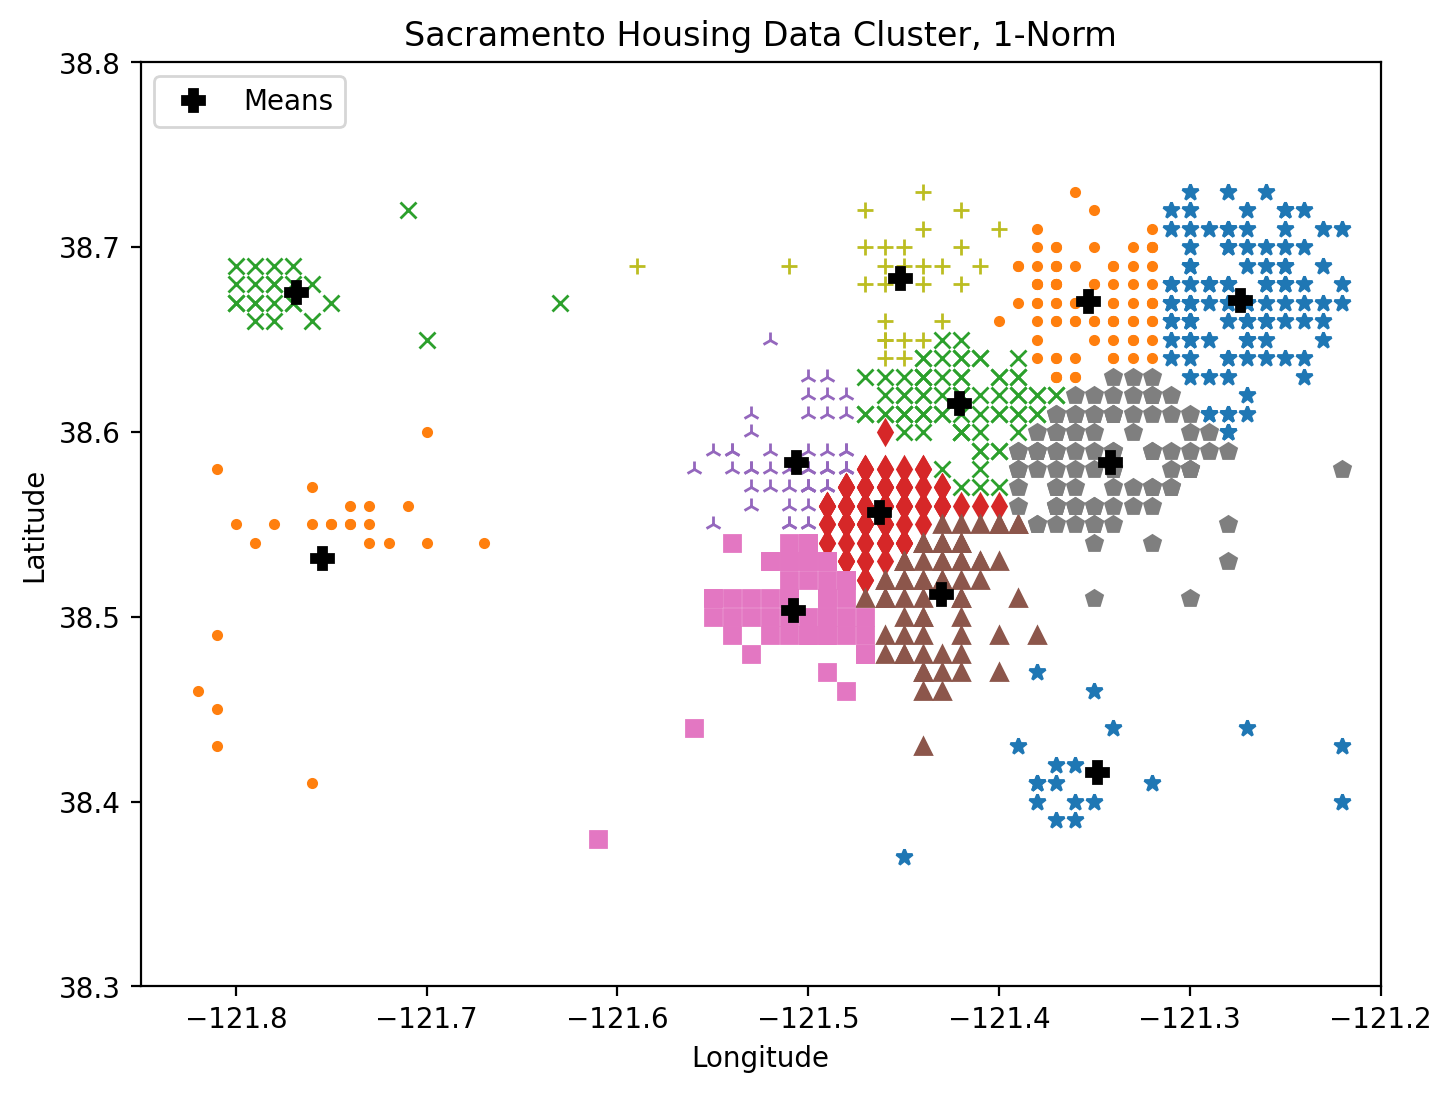

In [31]:
# Plotting the 1-norm
sac_1norm.plot(True, -121.85, -121.2, 38.3, 38.8, True, 'Sacramento Housing Data Cluster, 1-Norm', 'Longitude', 'Latitude')

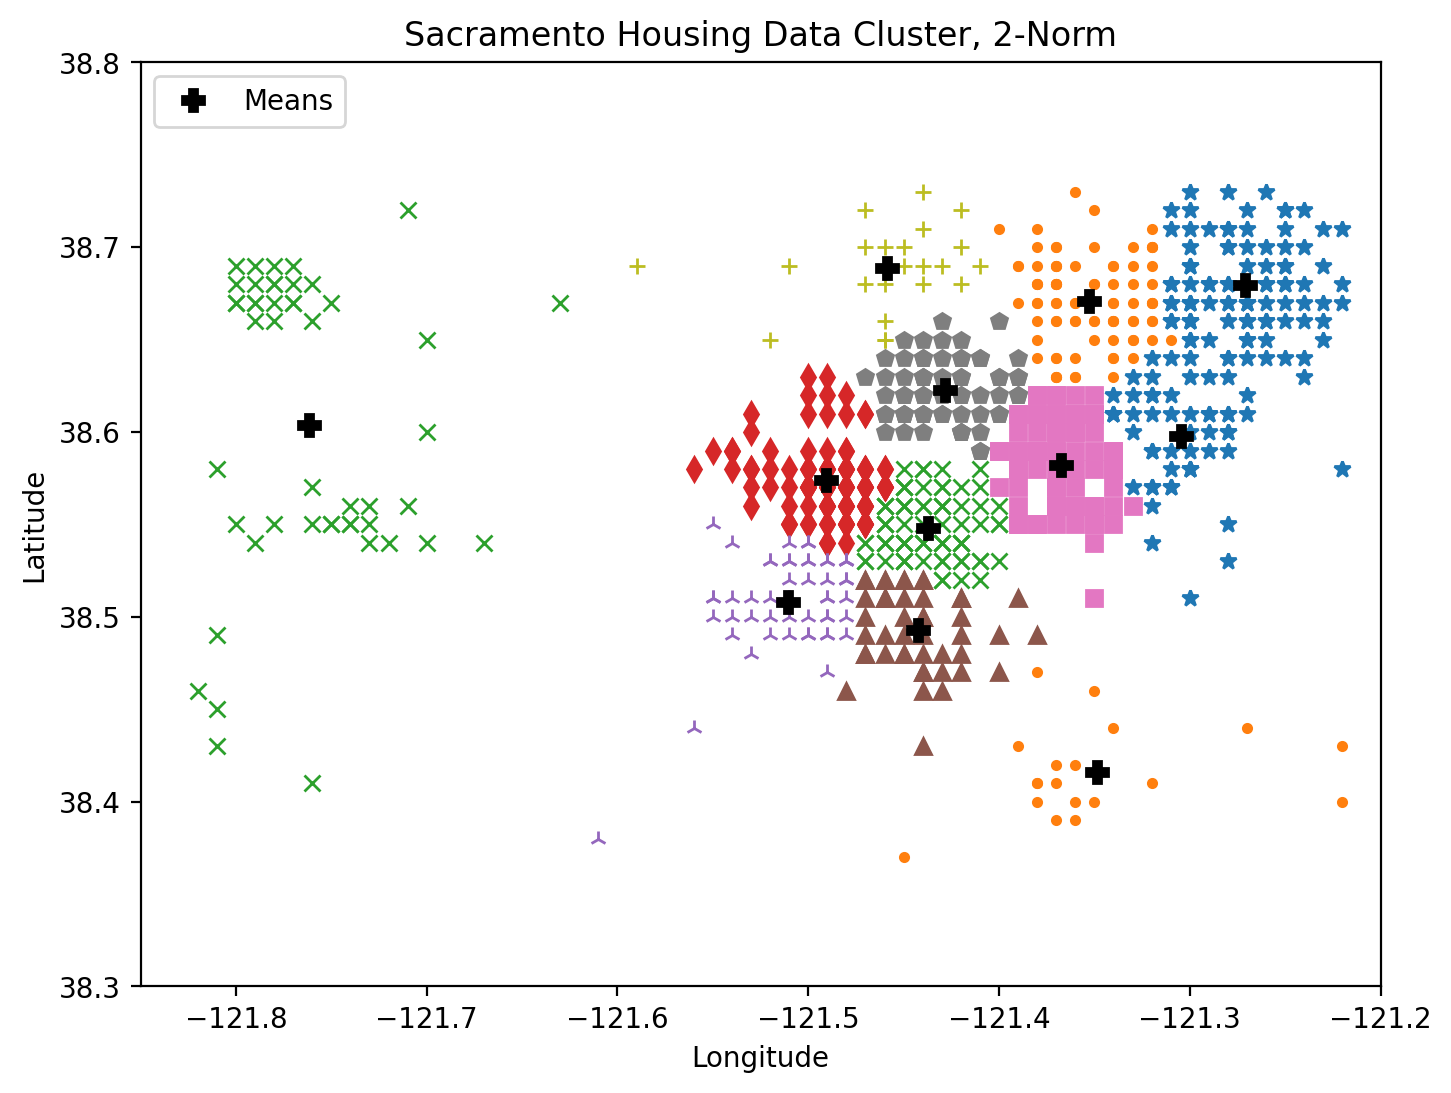

In [30]:
# Plotting the 2-norm
sac_2norm.plot(True, -121.85, -121.2, 38.3, 38.8, True, 'Sacramento Housing Data Cluster, 2-Norm', 'Longitude', 'Latitude')

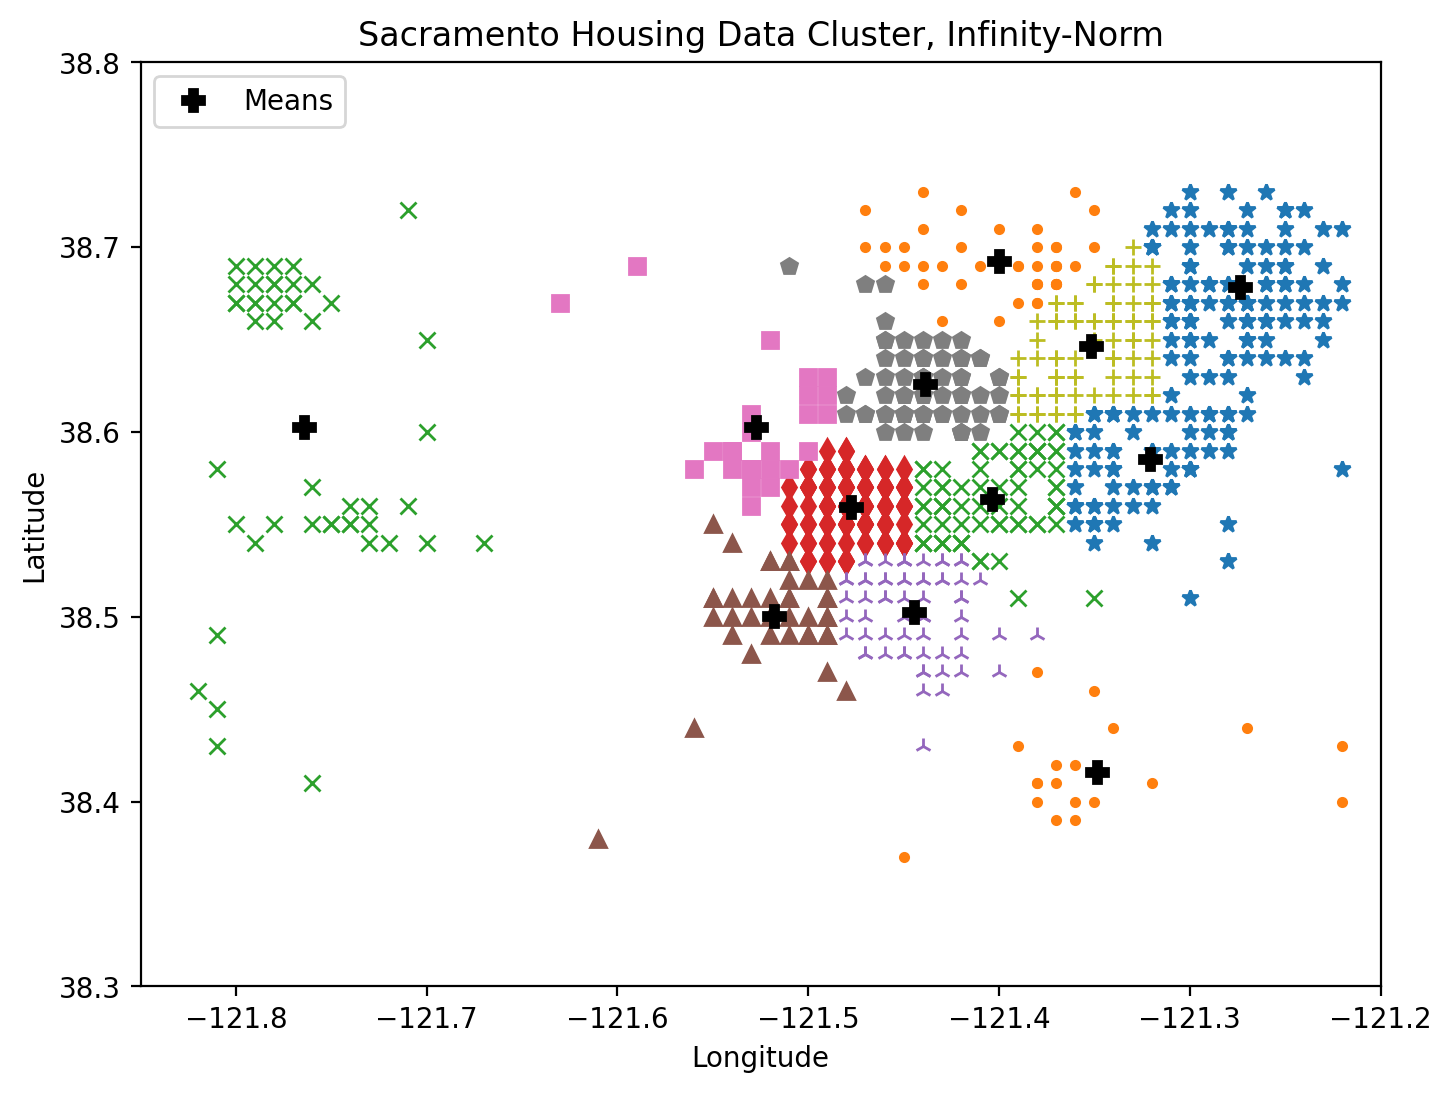

In [29]:
# Plotting the infinity norm
sac_Infnorm.plot(True, -121.85, -121.2, 38.3, 38.8, True, 'Sacramento Housing Data Cluster, Infinity-Norm', 'Longitude',  'Latitude')

The norm that works best for keeping the maximal small distance is the 1 norm. 

## Problem 3

Modify `KMeans.fit()` so that if `normalize` is `True`, the cluster centers are normalized at each iteration.

Cluster the earthquake data in three dimensions by converting the data from spherical coordinates to euclidean coordinates on the sphere.
1. Convert longitude and latitude to radians, then to spherical coordinates.
(Hint: `np.deg2rad()` may be helpful.)
2. Convert the spherical coordinates to euclidean coordinates in $\mathbb{R}^3$.
3. Use your `KMeans` class with normalization to cluster the euclidean coordinates.
4. Translate the cluster center coordinates back to spherical coordinates, then to degrees.
5. Plot the data, coloring by cluster.
Also mark the cluster centers.

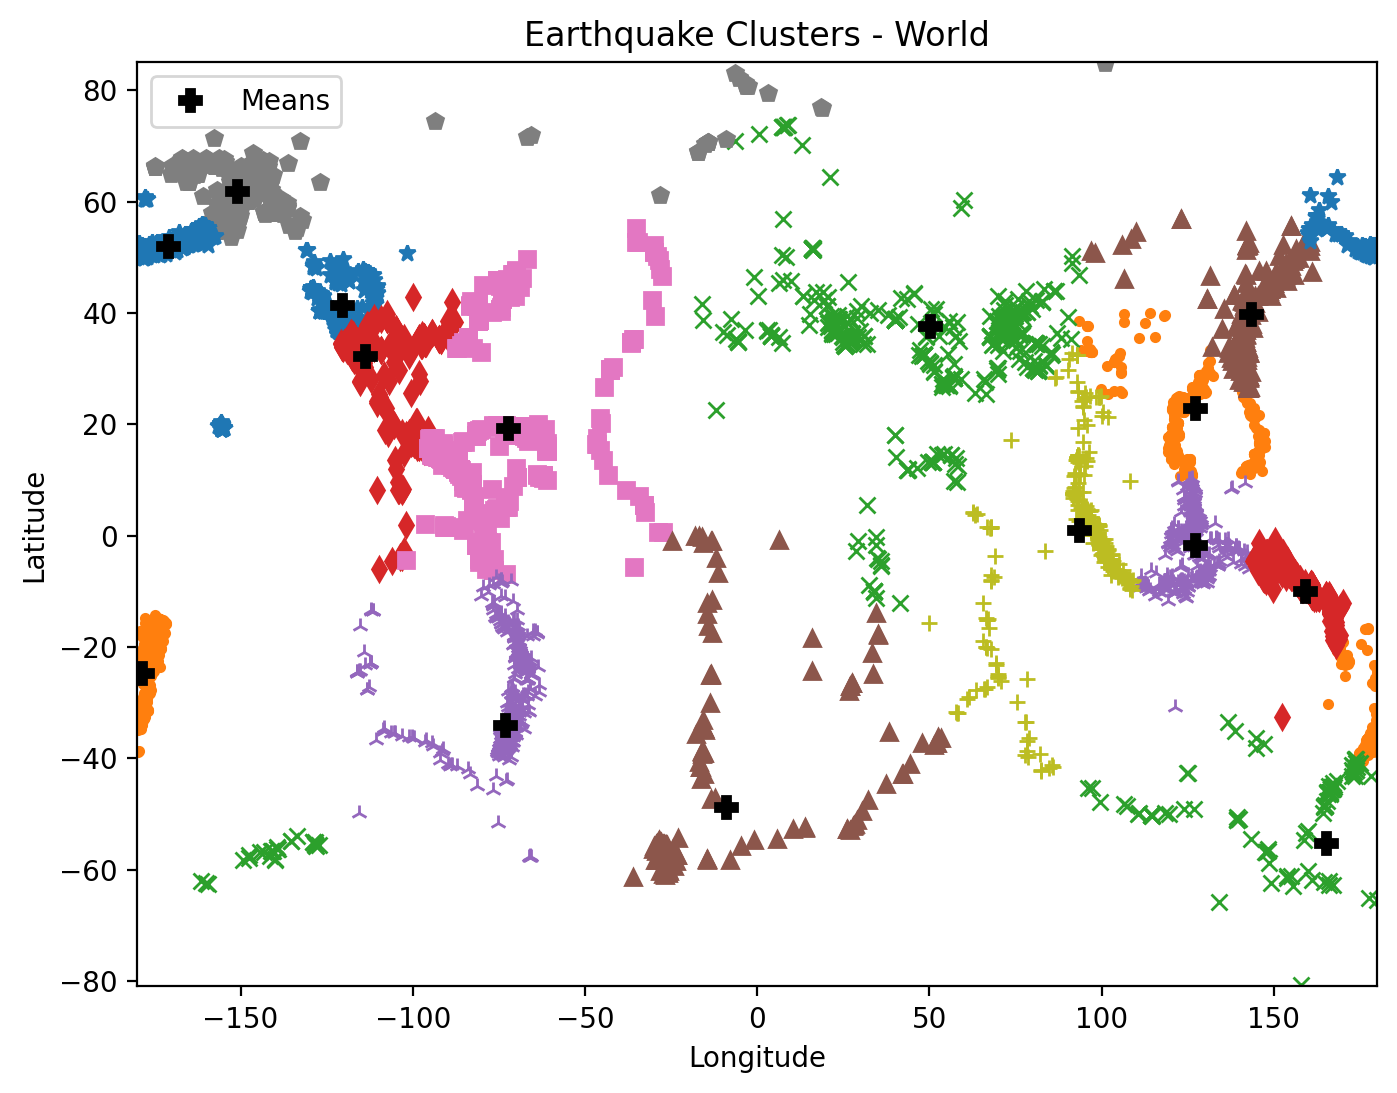

In [38]:
# Loading the data
earthquake_coords = np.load("earthquake_coordinates.npy")

# Converting the coordinates from spherical to euclidean
i = 0
euc_coords = np.array([None, None, None])

# Converting the coordinates from spherical to euclidean
for j in earthquake_coords:
    
    # Converting from degrees to radians
    theta = np.deg2rad(j[0])
    phi = np.deg2rad(90.-j[1])
    
    # Converting from spherical to euclidean
    x = np.sin(phi)*np.cos(theta)
    y = np.sin(phi)*np.sin(theta)
    z = np.cos(phi)
    point = np.array([x, y, z])
    
    # Adding the point to the euc_coords array
    euc_coords = np.vstack((euc_coords, point))

euc_coords = euc_coords[1:, :]

# Fitting the data 
Earthquakes = KMeans(normalize = True, n_clusters = 15)
Earthquakes.fit(euc_coords)
assignments, centers = Earthquakes.returnDictandCenters()

# Converting the centers back to spherical
euc_centers = [None] * len(centers)
i = 0

# Converting the centers back to spherical
for center in centers:

    # Converting from euclidean to spherical
    x = center[0]
    y = center[1]
    z = center[2]
    
    # Converting from spherical to euclidean
    phi = np.arccos(z)
    theta = np.arctan2(y, x)
    
    # Converting from radians to degrees
    lat = np.rad2deg(theta)
    long = 90 - np.rad2deg(phi)
    
    # Adding the center to the euc_centers array
    euc_centers[i] = np.array([lat, long])
    i += 1

Earthquakes.centers = euc_centers

# Converting the assignments back to spherical
for key in assignments:

    # Converting from euclidean to spherical
    lst_of_points = []

    # Converting the points back to spherical
    for point in assignments[key]:

        # Converting from euclidean to spherical
        x = point[0]
        y = point[1]
        z = point[2]
        
        # Converting from spherical to euclidean
        phi = np.arccos(z)
        theta = np.arctan2(y, x)
        
        # Converting from radians to degrees
        lat = np.rad2deg(theta)
        long = 90 - np.rad2deg(phi)
        
        # Adding the point to the lst_of_points array
        new_point = np.array([lat, long])
        
        lst_of_points.append(new_point)
        
    assignments[key] = lst_of_points
Earthquakes.assignments = assignments

# Plotting the data
Earthquakes.plot(new_titles=True, TITLE = "Earthquake Clusters - World", XLABEL = "Longitude", YLABEL = "Latitude")

## Problem 4

Write a function that accepts an image array (of shape $(m,n,3)$), an integer number of clusters $k$, and an integer number of samples $S$.
Reshape the image so that each row represents a single pixel.
Choose $S$ pixels to train a $k$-means model on with $k$ clusters.
Make a copy of the original picture where each pixel has the same color as its cluster center.
Return the new image.
For this problem, you may use `sklearn.cluster.KMeans` instead of your `KMeans` class.

Test your function on some of the provided NASA images.

In [35]:
def quantize_image(im, n_clusters=4, n_samples=50):
    """Cluster the pixels of the image 'im' by color.
    Return a copy of the image where each pixel is replaced by the value
    of its cluster center.
    
    Parameters:
        im ((m,n,3) ndarray): an image array.
        n_clusters (int): the number of k-means clusters.
        n_samples (int): the number of pixels to train the k-means model on.
    
    Returns:
        ((m,n,3) ndarray): the quantized image.
    """
    # Reshape the image array to (n_pixels, 3)
    im_pixels = im.reshape(-1, 3)

    # Randomly sample n_samples pixels from the image
    random_pixels = np.random.choice(im_pixels.shape[0], n_samples, replace = False)

    pts = im_pixels[random_pixels]


    # Fit the k-means model
    kmeans = KMeans(n_clusters = n_clusters)
    labels = kmeans.fit(pts).predict(im_pixels)
    centers = kmeans.centers

    dict = {i: j for i, j in enumerate(centers)}

    quantize_im = np.array([dict[i] for i in labels])

    # Return the quantized image
    return quantize_im.reshape(im.shape[0], im.shape[1], 3).astype(int)
_

# Plotting the image
def plot_im(fn):
    im = plt.imread(fn)
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(im)
    plt.axis('off')
    plt.title('Original')

    plt.subplot(122)
    plt.imshow(quantize_image(im))
    plt.axis('off')
    plt.title('Quantized')
    plt.show()

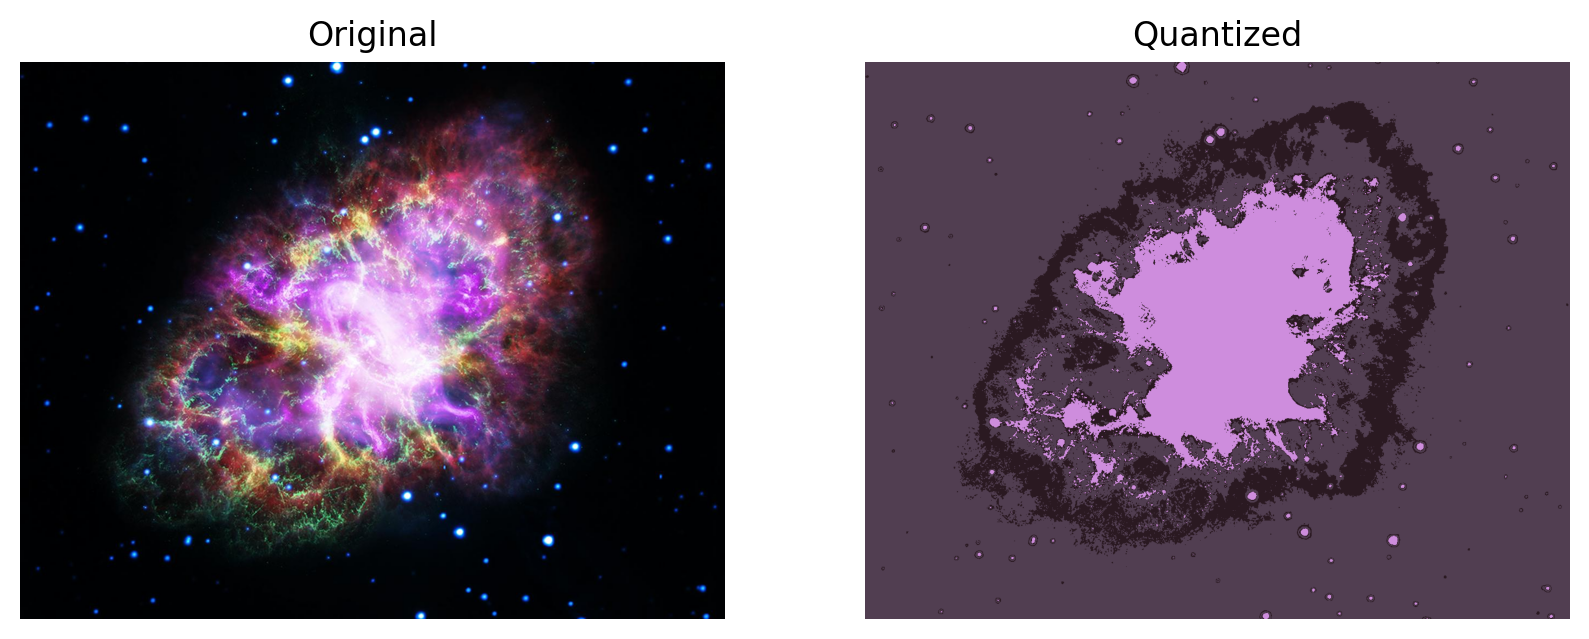

In [36]:
# Plotting the image
plot_im('nasa/crab_nebula.jpg')